# Step 1: Objective

In this project, I will analyse A/B test results using **Bayesian inference** to make probability-based business decisions.

## Problem Definition

Traditional A/B testing relies on frequentist hypothesis testing, providing p-values and confidence intervals that are often misunderstood in business contexts.

Bayesian A/B testing, on the other hand, estimates the **probability that one variant is better than another**, offering clearer, intuitive insights for marketing, product, and growth teams.

## Goals

1. Load and clean an A/B testing dataset  
2. Compare frequentist and Bayesian approaches to A/B test analysis  
3. Calculate the probability that variant B is better than variant A  
4. Provide business recommendations based on Bayesian results

## Business Impact

Using Bayesian inference for A/B tests enables data-driven decisions with **actionable probabilities**, reducing false positives and improving marketing and product optimisation strategies.


# Step 2: Creating a Synthetic A/B Testing Dataset

Since I do not have access to a public A/B testing dataset, I will generate a synthetic dataset for this analysis.

I will create data for:

- 10,000 users
- Random assignment to control or treatment groups
- Conversion rates of 10% for control and 12% for treatment groups

This will help me practice and demonstrate A/B testing analysis using both frequentist and Bayesian approaches.


In [1]:
# Step 2: Import Libraries

import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define total users
n_users = 10000

# Assign groups randomly
groups = np.random.choice(['control', 'treatment'], size=n_users)

# Define conversion rates
p_control = 0.10
p_treatment = 0.12

# Generate conversions based on group assignment
converted = []
for group in groups:
    if group == 'control':
        converted.append(np.random.binomial(1, p_control))
    else:
        converted.append(np.random.binomial(1, p_treatment))

# Create DataFrame
ab_df = pd.DataFrame({
    'user_id': np.arange(1, n_users + 1),
    'group': groups,
    'converted': converted
})

# Check dataset shape and preview
print("Synthetic A/B Testing dataset shape:", ab_df.shape)
ab_df.head()


Synthetic A/B Testing dataset shape: (10000, 3)


,user_id,group,converted
0,1,control,0
1,2,treatment,0
2,3,control,0
3,4,control,0
4,5,control,0


# Step 3: Data Understanding

I will now explore the synthetic dataset to understand:

- Group distribution (control vs treatment)
- Overall conversion rates

This helps verify that the dataset reflects the intended experimental setup and assumptions.


In [2]:
# Step 3: Check group distribution

group_counts = ab_df['group'].value_counts()
print("Group distribution:")
print(group_counts)

# Calculate conversion rate by group
conversion_rates = ab_df.groupby('group')['converted'].mean()
print("\nConversion rates by group:")
print(conversion_rates)


Group distribution:
group
control      5013
treatment    4987
Name: count, dtype: int64

Conversion rates by group:
group
control      0.100339
treatment    0.118709
Name: converted, dtype: float64


# Step 4: Frequentist A/B Test Analysis

I will first analyse the data using a frequentist approach to:

- Calculate conversion rate difference between treatment and control
- Conduct a two-proportion z-test to determine statistical significance

This provides a baseline comparison to the Bayesian approach.


In [3]:
# Step 4: Frequentist two-proportion z-test

from statsmodels.stats.proportion import proportions_ztest

# Get conversion counts
control_converted = ab_df[ab_df['group'] == 'control']['converted'].sum()
treatment_converted = ab_df[ab_df['group'] == 'treatment']['converted'].sum()

# Get sample sizes
n_control = ab_df[ab_df['group'] == 'control'].shape[0]
n_treatment = ab_df[ab_df['group'] == 'treatment'].shape[0]

# Run z-test
count = np.array([treatment_converted, control_converted])
nobs = np.array([n_treatment, n_control])

stat, pval = proportions_ztest(count, nobs, alternative='larger')

print(f"Z-test statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")


Z-test statistic: 2.9413
P-value: 0.0016


# Step 4.1: Frequentist Interpretation

If the p-value is less than 0.05, it suggests that the treatment group's conversion rate is significantly higher than the control group's.

However, p-values are often misunderstood. Therefore, I will now analyse the same data using a Bayesian approach to estimate:

- The **probability that treatment is better than control**, which is clearer for business decisions.


# Step 5: Bayesian A/B Test Analysis

I will now analyse the data using a Bayesian approach by:

- Using **Beta distributions** to model conversion rates
- Generating posterior distributions for control and treatment groups
- Calculating the probability that the treatment conversion rate is higher than the control

This approach provides intuitive insights such as:

"There is a 97% probability that treatment performs better than control."


In [4]:
# Step 5: Import necessary libraries

import scipy.stats as stats
import matplotlib.pyplot as plt

# Set prior parameters (uninformative Beta(1,1) prior)
alpha_prior = 1
beta_prior = 1

# Calculate posterior parameters for control group
alpha_control = control_converted + alpha_prior
beta_control = n_control - control_converted + beta_prior

# Calculate posterior parameters for treatment group
alpha_treatment = treatment_converted + alpha_prior
beta_treatment = n_treatment - treatment_converted + beta_prior

# Generate samples from posterior distributions
samples_control = np.random.beta(alpha_control, beta_control, 100000)
samples_treatment = np.random.beta(alpha_treatment, beta_treatment, 100000)


# Step 5.1: Visualising Posterior Distributions

I will plot the posterior distributions for the control and treatment conversion rates to visualise their probabilities.


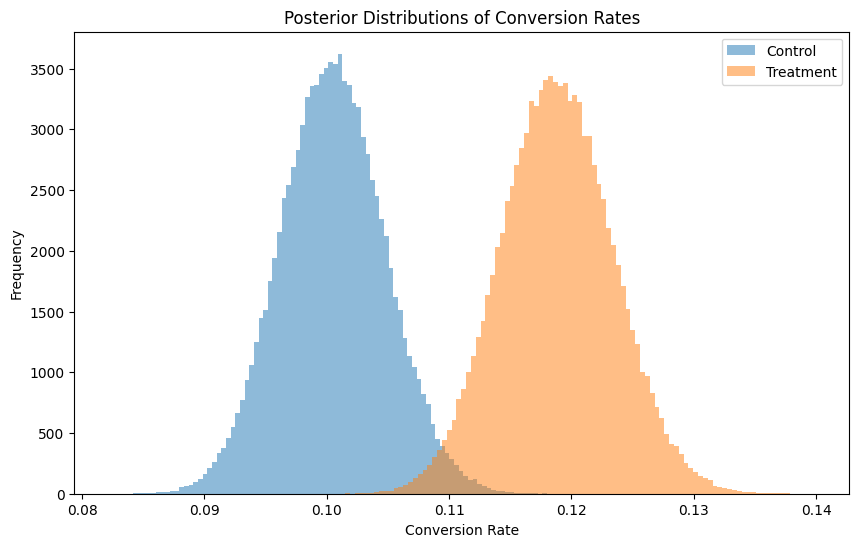

In [5]:
# Step 5.1: Plot posterior distributions

plt.figure(figsize=(10,6))
plt.hist(samples_control, bins=100, alpha=0.5, label='Control')
plt.hist(samples_treatment, bins=100, alpha=0.5, label='Treatment')
plt.title('Posterior Distributions of Conversion Rates')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Step 5.2: Calculate Probability Treatment is Better than Control

I will calculate the proportion of times the treatment sample is greater than the control sample to determine:

- The probability that treatment outperforms control


In [6]:
# Step 5.2: Calculate probability

prob_treatment_better = (samples_treatment > samples_control).mean()
print(f"Probability that treatment is better than control: {prob_treatment_better:.4f}")


Probability that treatment is better than control: 0.9986
